How did you start Notebook
--------------------------

When starting this notebook using this:
```bash
~/tutorial-env/bin/ipython notebook --pylab=inline
```
comment out the code in the following cell.

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import tempfile
result_dir=tempfile.mkdtemp()
print "Generated input data is saved in: "+result_dir

Generated input data is saved in: /tmp/tmpB7rvUK


(-0.5, 63.5, 63.5, -0.5)

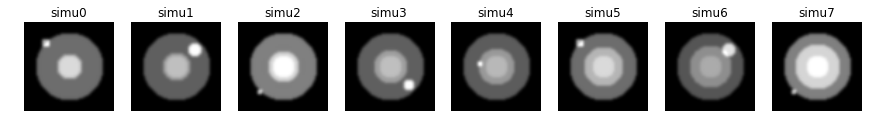

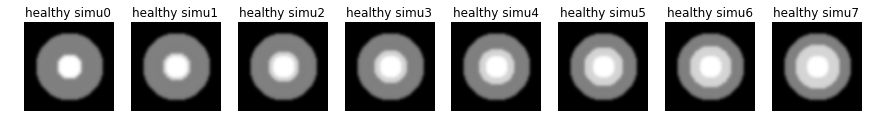

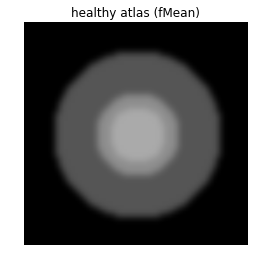

In [5]:
import numpy as np # Numpy for general purpose processing
import SimpleITK as sitk # SimpleITK to load images
import sys
import os
import matplotlib.pyplot as plt

def circleImage(radius, x_dim,y_dim, label):
    sData = np.zeros((x_dim,y_dim))
    for i in range(x_dim):
        for j in range (y_dim):
                if ( pow(i-x_dim/2.0,2) + pow(j-y_dim/2.0,2)) < pow(radius,2):
                    sData[i,j] = label
    return sData

def randomObject(radius, x_dim,y_dim, label,l_x,l_y):
    tData = np.zeros((x_dim,y_dim))
    for i in range(x_dim):
        for j in range (y_dim):
                if ( pow(i-l_x,2) + pow(j-l_y,2))< pow(radius,2) :
                    tData[i,j] = label
    return tData

def simuGen(radii,baseIntensity,outputImageFileName,objectLocation =[0,0],objectRadius = 0, gaussianSigma = 1.0):
    s1 = circleImage(radii[2],size,size,baseIntensity*3)
    s2 = circleImage(radii[1],size,size,baseIntensity*2)
    s3 = circleImage(radii[0],size,size,baseIntensity)

    t = randomObject(objectRadius,size,size,baseIntensity*5, objectLocation[0],objectLocation[1])
    s_final = s1 + s2 + s3 +t

    img = sitk.GetImageFromArray(s_final)
    img.SetOrigin([0,0])
    img.SetSpacing([1.0,1.0])

    # apply gaussian blur
    gaussian = sitk.SmoothingRecursiveGaussianImageFilter()
    gaussian.SetSigma (gaussianSigma )
    img_blur = gaussian.Execute (img)
    s_final = sitk.GetArrayFromImage(img_blur)
    sitk.WriteImage(img_blur,outputImageFileName)
    return s_final

os.system('mkdir '+ result_dir)
size = 64
smallSphereRadius = size/8
largeSphereRadius = size*3/8
midSphereRaidus = (smallSphereRadius + largeSphereRadius )/2

num_of_simulation = 8
stepRadius =(largeSphereRadius-smallSphereRadius )/(num_of_simulation +1)
objectRadius = 6.0
t = np.zeros((num_of_simulation,2))
t[0] = [15,15]
t[1] = [20,45]
t[2] = [50,15]
t[3] = [45,45]
t[4] = [30,20]
t[5] = [15,15]
t[6] = [20,45]
t[7] = [50,15]

r = [3,5,2,4,2,3,5,2]

fig = plt.figure(figsize=(15,5))
for i in range (num_of_simulation):
    simuFileName =result_dir + '/simu'+str(i)+'.nrrd'
    midSphereRaidus = smallSphereRadius + stepRadius*(i+1)
    objectLocation = [t[i][0],t[i][1]]
    objectRadius = r[i]
    imArray = simuGen([smallSphereRadius,midSphereRaidus,largeSphereRadius],10.0,simuFileName,objectLocation, objectRadius)
    fig.add_subplot(1,num_of_simulation,i+1)
    implot = plt.imshow(imArray,plt.cm.gray)
    plt.axis('off')
    plt.title('simu'+str(i))

# generate healthy bull's eye images
fig = plt.figure(figsize=(15,5))
for i in range (num_of_simulation):
    simuFileName = result_dir + '/healthySimu'+str(i)+'.nrrd'
    midSphereRaidus = smallSphereRadius + stepRadius*(i+1)
    imArray = simuGen([smallSphereRadius,midSphereRaidus,largeSphereRadius],10.0,simuFileName,[0,0], 0)
    fig.add_subplot(1,num_of_simulation,i+1)
    implot = plt.imshow(imArray,plt.cm.gray)
    plt.axis('off')
    plt.title('healthy simu'+str(i))
    
midSphereRaidus = smallSphereRadius + stepRadius*(1+2+3+4+5+6+7+8)/8    
imArray = simuGen([smallSphereRadius,midSphereRaidus,largeSphereRadius],10.0, result_dir + '/fMeanSimu.nrrd',[0,0], 0)
plt.figure()
plt.imshow(imArray,plt.cm.gray,vmin=0,vmax=90)
plt.title('healthy atlas (fMean)')
plt.axis('off')
    
    